In [299]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from copy import deepcopy

# Это базис бро

# 3d челик

In [265]:
vs = np.array([
    [0, 1, 0],
    [1, 1, 0],
    [0, 0, 0],
    [1, 0, 0],
    
    [0, 1, 1],
    [1, 1, 1],
    [0, 0, 1],
    [1, 0, 1]
])

<img src="misc/cube.png" width=500/>

## Поворот

In [209]:
def rot_x(vs, theta):
    theta = np.radians(theta)
    return vs @ np.array([
        [1,       0,              0      ],
        [0, np.cos(theta), -np.sin(theta)],
        [0, np.sin(theta),  np.cos(theta)]
    ])

def rot_y(vs, theta):
    theta = np.radians(theta)
    return vs @ np.array([
        [np.cos(theta),  0, np.sin(theta)],
        [      0,        1,       0      ],
        [-np.sin(theta), 0, np.cos(theta)]
    ])

def rot_z(vs, theta):
    theta = np.radians(theta)
    return vs @ np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta),  np.cos(theta), 0],
        [      0,              0,       1]
    ])

## Перенос

In [208]:
def move_x(vs, d):
    vs_moved = deepcopy(vs)
    for v in vs_moved:
        v[0] -= d
        
    return vs_moved

def move_y(vs, d):
    vs_moved = deepcopy(vs)
    for v in vs_moved:
        v[1] -= d
        
    return vs_moved

def move_z(vs, d):
    vs_moved = deepcopy(vs)
    for v in vs_moved:
        v[2] -= d
        
    return vs_moved

## Растяжение

In [193]:
def resize_x(vs, k):
    vs_resized = deepcopy(vs)
    for v in vs_resized:
        v[0] *= k
        
    return vs_resized

def resize_y(vs, k):
    vs_resized = deepcopy(vs)
    for v in vs_resized:
        v[1] *= k
        
    return vs_resized

def resize_z(vs, k):
    vs_resized = deepcopy(vs)
    for v in vs_resized:
        v[2] *= k
        
    return vs_resized

## Отражение

In [270]:
def mirror_x(vs):
    vs_resized = deepcopy(vs)
    for v in vs_resized:
        v[0] = -v[0]
        
    return vs_resized

def mirror_y(vs):
    vs_resized = deepcopy(vs)
    for v in vs_resized:
        v[1] = -v[1]
        
    return vs_resized

def mirror_z(vs):
    vs_resized = deepcopy(vs)
    for v in vs_resized:
        v[2] = -v[2]
        
    return vs_resized

## Отрисовка

In [266]:
def lines_3d(vs):
    vs_coords = vs.T.ravel()
    n_coords = vs_coords.shape[0]
    
    vs_x, vs_y, vs_z = vs_coords[:int(n_coords/3)], vs_coords[int(n_coords/3):int(n_coords/3)*2], vs_coords[int(n_coords/3)*2:]
    
    lines = [
        [[vs_x[0], vs_x[1]], [vs_y[0], vs_y[1]], [vs_z[0], vs_z[1]]],
        [[vs_x[0], vs_x[2]], [vs_y[0], vs_y[2]], [vs_z[0], vs_z[2]]],
        [[vs_x[0], vs_x[4]], [vs_y[0], vs_y[4]], [vs_z[0], vs_z[4]]],
        
        [[vs_x[1], vs_x[3]], [vs_y[1], vs_y[3]], [vs_z[1], vs_z[3]]],
        [[vs_x[1], vs_x[5]], [vs_y[1], vs_y[5]], [vs_z[1], vs_z[5]]],
        
        [[vs_x[2], vs_x[3]], [vs_y[2], vs_y[3]], [vs_z[2], vs_z[3]]],
        [[vs_x[2], vs_x[6]], [vs_y[2], vs_y[6]], [vs_z[2], vs_z[6]]],
        
        [[vs_x[3], vs_x[7]], [vs_y[3], vs_y[7]], [vs_z[3], vs_z[7]]],
        
        
        [[vs_x[4], vs_x[6]], [vs_y[4], vs_y[6]], [vs_z[4], vs_z[6]]],
        [[vs_x[4], vs_x[5]], [vs_y[4], vs_y[5]], [vs_z[4], vs_z[5]]],
        
        [[vs_x[5], vs_x[7]], [vs_y[5], vs_y[7]], [vs_z[5], vs_z[7]]],
        
        [[vs_x[6], vs_x[7]], [vs_y[6], vs_y[7]], [vs_z[6], vs_z[7]]]
    ]
    
    return lines

In [267]:
def scale(ax, s=1, a=0.):
    ax.plot([-s, s], [0, 0], [0, 0], alpha=a)
    ax.plot([0, 0], [-s, s], [0, 0], alpha=a)
    ax.plot([0, 0], [0, 0], [-s, s], alpha=a)

# Рисуем

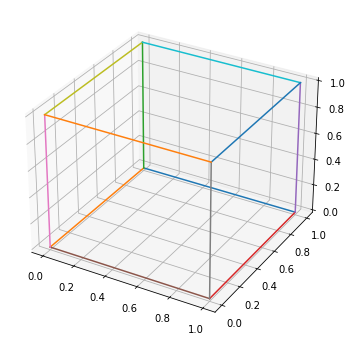

In [268]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')

for coord_x, coord_y, coord_z in lines_3d(vs):
    ax.plot(coord_x, coord_y, coord_z)

plt.show()

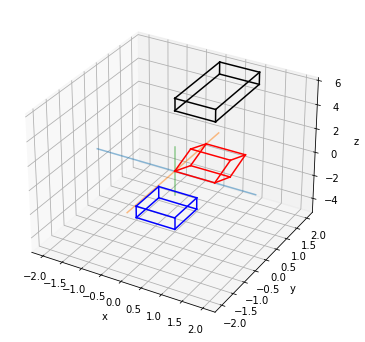

In [271]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')

scale(ax, 2, 0.5)
for coord_x, coord_y, coord_z in lines_3d(move_z(resize_y(vs, 2), -5)):
    ax.plot(coord_x, coord_y, coord_z, c='black')
    
for coord_x, coord_y, coord_z in lines_3d(rot_x(vs, 45)):
    ax.plot(coord_x, coord_y, coord_z, c='red')
    
for coord_x, coord_y, coord_z in lines_3d(mirror_x(move_z(vs, 5))):
    ax.plot(coord_x, coord_y, coord_z, c='blue')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
    
plt.show()

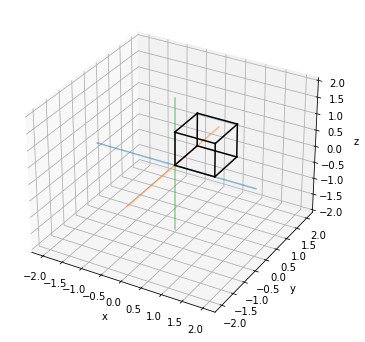

Your next move:  rot x 45


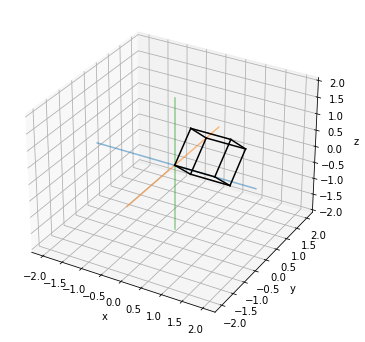

Your next move:  reset


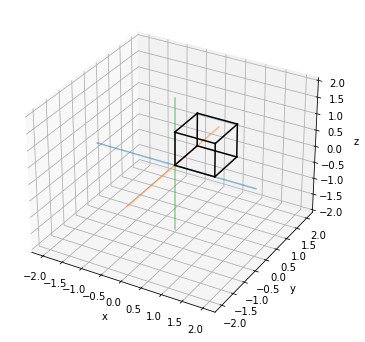

Your next move:  exir


AssertionError: Unknown command

In [307]:
funcs = {
    'move': {
        'x': move_x,
        'y': move_y,
        'z': move_z
    },
    'resize': {
        'x': resize_x,
        'y': resize_y,
        'z': resize_z
    },
    'mirror': {
        'x': mirror_x,
        'y': mirror_y,
        'z': mirror_z
    },
    'rot': {
        'x': rot_x,
        'y': rot_y,
        'z': rot_z
    }
}

cube_color = 'black'

plt.show()

vs_w = deepcopy(vs)
while True:
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(projection='3d')

    scale(ax, 2, 0.5)
    for coord_x, coord_y, coord_z in lines_3d(vs_w):
        ax.plot(coord_x, coord_y, coord_z, c=cube_color)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
    plt.show()
    
    stdin = input('Your next move: ')
    
    if stdin.lower() == 'exit':
        break
        
    if stdin.lower() == 'reset':
        vs_w = deepcopy(vs)
        continue
    
    assert len(stdin.split(' ')) == 3, 'Unknown command'
    action, axis, value = stdin.lower().split(' ')

    vs_w = funcs[action][axis](vs_w, float(value))

# Помои

In [59]:
def to_drawable(vs, focal_len=1):
    vs_proj_coords = render_3d(vs, focal_len).T.ravel()
    n_coords = vs_proj_coords.shape[0]
    
    vs_proj_x, vs_proj_y = vs_proj_coords[:int(n_coords/2)], vs_proj_coords[int(n_coords/2):]
    
    lines = [
        [[vs_proj_x[0], vs_proj_x[1]], [vs_proj_y[0], vs_proj_y[1]]],
        [[vs_proj_x[0], vs_proj_x[2]], [vs_proj_y[0], vs_proj_y[2]]],
        [[vs_proj_x[0], vs_proj_x[4]], [vs_proj_y[0], vs_proj_y[4]]],
        
        [[vs_proj_x[1], vs_proj_x[3]], [vs_proj_y[1], vs_proj_y[3]]],
        [[vs_proj_x[1], vs_proj_x[5]], [vs_proj_y[1], vs_proj_y[5]]],
        
        [[vs_proj_x[2], vs_proj_x[3]], [vs_proj_y[2], vs_proj_y[3]]],
        [[vs_proj_x[2], vs_proj_x[6]], [vs_proj_y[2], vs_proj_y[6]]],
        
        [[vs_proj_x[3], vs_proj_x[7]], [vs_proj_y[3], vs_proj_y[7]]],
        
        
        [[vs_proj_x[4], vs_proj_x[6]], [vs_proj_y[4], vs_proj_y[6]]],
        [[vs_proj_x[4], vs_proj_x[5]], [vs_proj_y[4], vs_proj_y[5]]],
        
        [[vs_proj_x[5], vs_proj_x[7]], [vs_proj_y[5], vs_proj_y[7]]],
        
        [[vs_proj_x[6], vs_proj_x[7]], [vs_proj_y[6], vs_proj_y[7]]]
    ]
    
    return lines

In [107]:
def proj_x(v, focal_len):
    #return (focal_len * v[0]) / (focal_len + v[-1])
    return v[0] * focal_len / v[-1]
def proj_y(v, focal_len):
    # return (focal_len * v[1]) / (focal_len + v[-1])
    return v[1] * focal_len / v[-1]

def render_3d(vectors, focal_len=1):
    projs = []
    for v in vectors:
        projs.append([proj_x(v, focal_len), proj_y(v, focal_len)])

    return np.array(projs)